In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


KNN

In [4]:
datos = pd.read_csv("data.csv")

datos

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


Eliminamos la columna 'filename' porque sólo es un ID (único para cada resgistro), y no nos da información

In [5]:
datos = datos.drop(columns='filename')

Separar las features de las etiquetas

In [10]:
X = datos.drop("label", axis=1)
y = datos["label"]

Escalamos los datos para poder comparar features entre sí.

In [12]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index= X.index)

Calculamos el PCA

In [17]:
pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X), index = X.index)


gaficamos los dos primeros componentes del pca

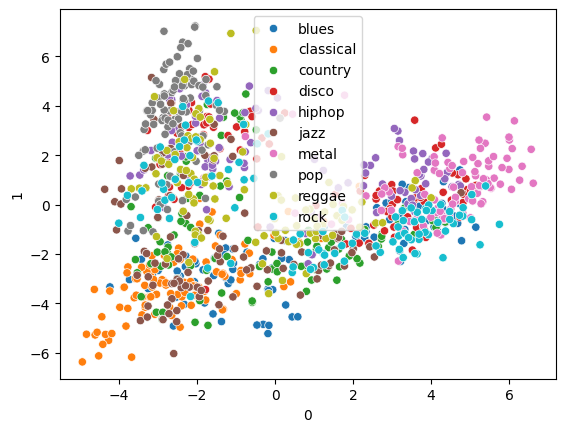

In [19]:
sns.scatterplot(X_pca, x=0, y=1, hue=(y).astype(str))
plt.legend()
plt.show()

In [21]:
exp_var = pd.DataFrame(pca.explained_variance_ratio_, columns= ["explained_variance"])
exp_var["acumulativo"] = exp_var.explained_variance.cumsum()
exp_var

,explained_variance,acumulativo
0,0.300156,0.300156
1,0.237350,0.537506
2,0.097190,0.634696
3,0.069538,0.704233
4,0.055514,0.759748
5,0.033587,0.793335
6,0.031778,0.825114
7,0.026267,0.851380
8,0.019326,0.870706
9,0.016334,0.887040


Apartamos todos los registros que tengan la etiqueta: metal, pop, classical y jazz

In [22]:
#busca los elemnetos que cumplen la condición 
sample_index = y[(y == "metal") | (y == "pop") | (y == "classical") | (y == "jazz")].index  

#Aparta los elementos con esos índex
X_sample = X_pca.loc[sample_index]
y_sample = y.loc[sample_index]

Como vamos a entrenar un modelo clasificación, separamos el dataset en entrenamiento y prueba

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

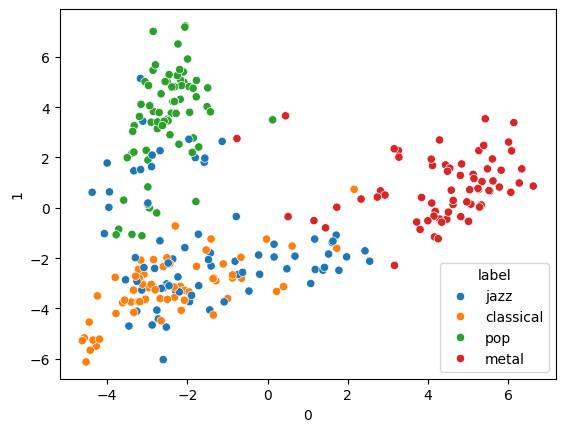

In [25]:
sns.scatterplot(X_train, x=0, y=1, hue= (y_train).astype(str))
plt.show()

Utilizamos el algoritmo KNN para clasificar cada punto del test en función de los vecinos más cercanos

In [36]:
knn = KNeighborsClassifier(n_neighbors=5, weights= 'distance') #Weights = 'distance'
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#macro avg = hace el promerdio de las estadísticas sin importar la cantidad de clases
#weighted avg = cuantos le achunte en función de cuantos hay en el dataset

[[33  4  0  0]
 [ 4 15  1  5]
 [ 0  0 30  0]
 [ 0  0  0 28]]
              precision    recall  f1-score   support

   classical       0.89      0.89      0.89        37
        jazz       0.79      0.60      0.68        25
       metal       0.97      1.00      0.98        30
         pop       0.85      1.00      0.92        28

    accuracy                           0.88       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.88      0.88      0.88       120



Decision tree

In [39]:
#Empecemos denuevo con el dataset. Sin split, sin pca, sin ningún cambio.
datos = pd.read_csv("data.csv")
datos = datos.drop(columns= 'filename')

X = datos.drop("label", axis=1)
y = datos["label"]

Nuevamente, dejamos sólo los datos con metal, pop, clásica y jazz.

In [40]:
sample_index = y[(y == "metal") | (y == "pop") | (y == "classical") | (y == "jazz")].index 
X_sample = X.loc[sample_index]
y_sample = y.loc[sample_index]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

In [44]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[27 10  0  0]
 [ 5 19  1  0]
 [ 0  2 28  0]
 [ 0  2  0 26]]
              precision    recall  f1-score   support

   classical       0.84      0.73      0.78        37
        jazz       0.58      0.76      0.66        25
       metal       0.97      0.93      0.95        30
         pop       1.00      0.93      0.96        28

    accuracy                           0.83       120
   macro avg       0.85      0.84      0.84       120
weighted avg       0.85      0.83      0.84       120



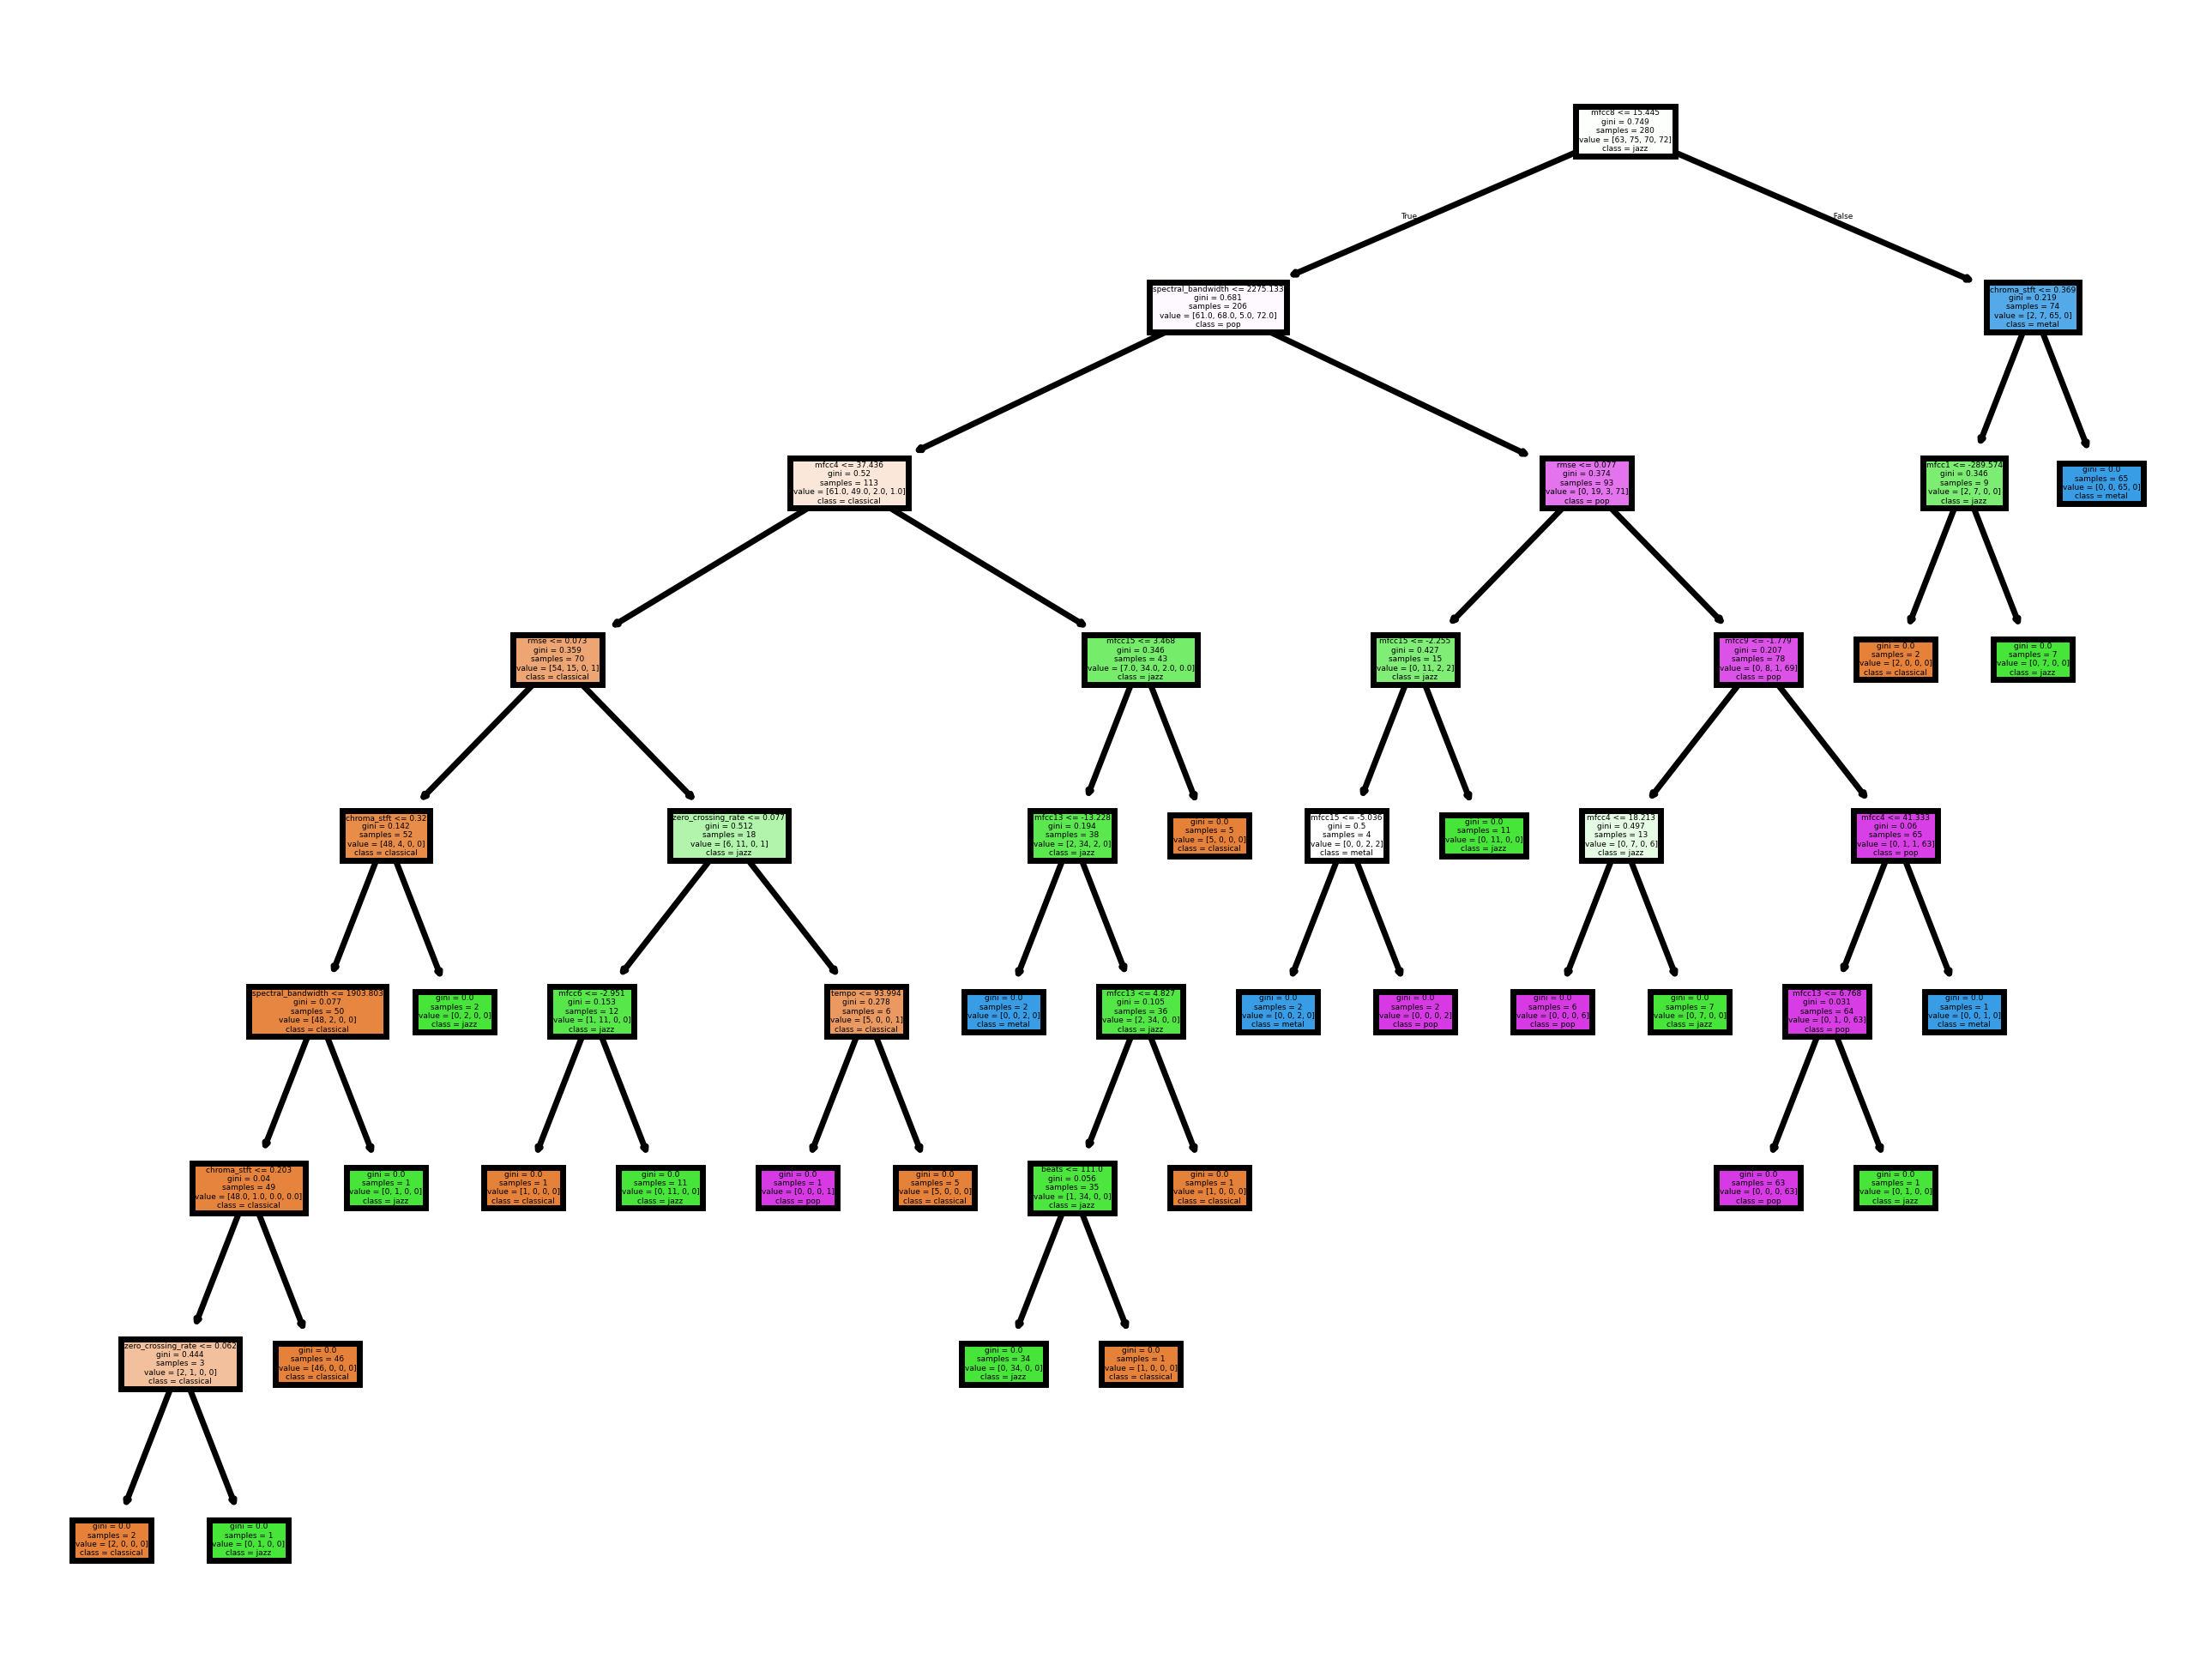

In [45]:
plt.figure(dpi=500)
plot_tree(model, filled= True, feature_names= model.feature_names_in_, class_names= model.classes_)
plt.show()